In [1]:
try:
# %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

In [195]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# prepare train and test sets
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize values
train_images = train_images / 255.0
test_images = test_images / 255.0


In [196]:
len(train_labels)

60000

In [197]:
import pandas as pd
df=pd.DataFrame({"images": train_images.tolist(),"labels" : train_labels})

In [198]:
df.head(5)

,images,labels
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156885936856...",0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12...",3
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


In [199]:
df=df.sort_values(by=['labels'], ascending=True).reset_index()

In [200]:
df

,index,images,labels
0,19377,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1,5459,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0313725...",0
2,5457,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3,32821,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156885936856...",0
4,54795,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0156862...",0
...,...,...,...
59995,28164,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
59996,28175,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
59997,28190,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
59998,27302,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9


In [201]:
df["index"]=df.index
df1=df[df["index"].map(lambda x: x%2==0)].reset_index()
df1

,level_0,index,images,labels
0,0,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1,2,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
2,4,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0156862...",0
3,6,6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1764705...",0
4,8,8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313771873712...",0
...,...,...,...,...
29995,59990,59990,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
29996,59992,59992,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
29997,59994,59994,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
29998,59996,59996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9


In [202]:
df1["images1"]=df[df["index"].map(lambda x: x%2!=0)].reset_index()["images"]
df1["labels1"]=df[df["index"].map(lambda x: x%2!=0)].reset_index()["labels"]

In [203]:
df1

,level_0,index,images,labels,images1,labels1
0,0,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0313725...",0
1,2,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156885936856...",0
2,4,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0156862...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0039215...",0
3,6,6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1764705...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0039215...",0
4,8,8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313771873712...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3372549...",0
...,...,...,...,...,...,...
29995,59990,59990,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
29996,59992,59992,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
29997,59994,59994,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
29998,59996,59996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9


In [204]:
df2=df1.drop(["level_0","index","labels1"], axis=1)

In [205]:
df2

,images,labels,images1
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0313725..."
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156885936856..."
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0156862...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0039215..."
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1764705...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0039215..."
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313771873712...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3372549..."
...,...,...,...
29995,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29998,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [206]:
index=df2.iloc[15000:29999].index
index

RangeIndex(start=15000, stop=29999, step=1)

In [207]:
images=df2["images1"].iloc[15000:29999].sample(frac=1).reset_index().drop("index",axis=1)
images.index=index
images

,images1
15000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
15001,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
15002,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
15003,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
15004,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...
29994,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29995,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078431..."


In [208]:
df2["images1"].iloc[15000:29999]=images["images1"]

E:\anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [209]:
df2.iloc[15000:29999]

,images,labels,images1
15000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
15001,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
15002,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
15003,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
15004,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...
29994,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29995,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
29997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078431..."


In [210]:
float(1)

1.0

In [211]:
df2["y_label"]=float(1)

In [212]:
df2["y_label"].iloc[15000:30000]=float(0)

E:\anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [213]:
df2.head(5)

,images,labels,images1,y_label
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0313725...",1.0
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156885936856...",1.0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0156862...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0039215...",1.0
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1764705...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0039215...",1.0
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00784313771873712...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3372549...",1.0


In [214]:
df2=df2.sample(frac=1).reset_index(drop=True)

In [215]:
df2

,images,labels,images1,y_label
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[[0.0, 0.0, 0.0, 0.003921568859368563, 0.0, 0....",1.0
...,...,...,...,...
29995,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156885936856...",6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0
29996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0117647...",0.0
29997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
29998,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.0


In [232]:
def initialize_base_network():
    input = Input(shape=(28,28,), name="base_input")
    x = Flatten(name="flatten_input")(input)
    
    x = Dense(128, activation='relu', name="first_base_dense")(x)
    x = Dropout(0.1, name="first_dropout")(x)
    
    x = Dense(128, activation='relu', name="second_base_dense")(x)
    x = Dropout(0.1, name="second_dropout")(x)
    
    x = Dense(128, activation='relu', name="third_base_dense")(x)

    return Model(inputs=input, outputs=x)


def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

margin=1
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return (y_true * square_pred + (1 - y_true) * margin_square)


In [233]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [234]:
base_network = initialize_base_network()
plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='base-model.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [235]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(df2, test_size=0.2)

In [236]:
# create the left input and point to the base network
input_a = Input(shape=(28,28,), name="left_input")
vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(28,28,), name="right_input")
vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], output)

# plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [238]:
rms = RMSprop()
model.compile(loss=contrastive_loss, optimizer=rms)
history = model.fit([np.array(train["images"].tolist()),
                     np.array(train["images1"].tolist())],
                    np.array(train["y_label"]), 
                    epochs=20, 
                    batch_size=128, 
                    validation_data=([np.array(test["images"].tolist()),
                                      np.array(test["images1"].tolist())], 
                                      np.array(test["y_label"])))

Epoch 1/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0451 - val_loss: 0.0261
Epoch 2/20
188/188 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.0271
Epoch 3/20
188/188 [==============================] - 0s 3ms/step - loss: 0.0216 - val_loss: 0.0303
Epoch 4/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0191 - val_loss: 0.0248
Epoch 5/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0181 - val_loss: 0.0227
Epoch 6/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0168 - val_loss: 0.0205
Epoch 7/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0169 - val_loss: 0.0192
Epoch 8/20
188/188 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.0168
Epoch 9/20
188/188 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.0194
Epoch 10/20
188/188 [==============================] - 1s 3ms/step - loss: 0.0145 - val_loss: 0.0215

In [239]:
loss = model.evaluate(
    x=[
        np.array(train["images"].tolist()),
        np.array(train["images1"].tolist())
    ], 
    y=np.array(train["y_label"]))


750/750 [==============================] - 1s 1ms/step - loss: 0.0158


In [240]:
y_pred_train = model.predict([
                              np.array(test["images"].tolist()),
                              np.array(test["images1"].tolist())
                             ]
                            )

In [241]:
y_pred_test = model.predict([np.array(train["images"].tolist()),np.array(train["images1"].tolist())])

In [242]:
train_accuracy = compute_accuracy(np.array(train["y_label"]), y_pred_train)

test_accuracy = compute_accuracy(np.array(test["y_label"]), y_pred_test)

<ipython-input-233-ad69466891c8>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(pred == y_true)


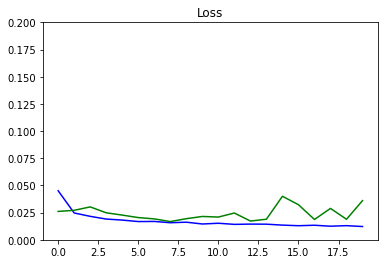

In [243]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


plot_metrics(metric_name='loss', title="Loss", ylim=0.2)

In [244]:
# Matplotlib config
def visualize_images():
    plt.rc('image', cmap='gray_r')
    plt.rc('grid', linewidth=0)
    plt.rc('xtick', top=False, bottom=False, labelsize='large')
    plt.rc('ytick', left=False, right=False, labelsize='large')
    plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
    plt.rc('text', color='a8151a')
    plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts


# utility to display a row of digits with their predictions
def display_images(left, right, predictions, labels, title, n):
    plt.figure(figsize=(17,3))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.grid(None)
    left = np.reshape(left, [n, 28, 28])
    left = np.swapaxes(left, 0, 1)
    left = np.reshape(left, [28, 28*n])
    plt.imshow(left)
    plt.figure(figsize=(17,3))
    plt.yticks([])
    plt.xticks([28*x+14 for x in range(n)], predictions)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if predictions[i] > 0.5: t.set_color('red') # bad predictions in red
    plt.grid(None)
    right = np.reshape(right, [n, 28, 28])
    right = np.swapaxes(right, 0, 1)
    right = np.reshape(right, [28, 28*n])
    plt.imshow(right)

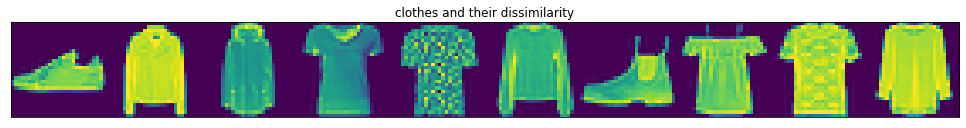

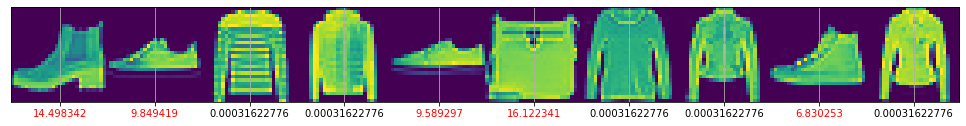

In [245]:
y_pred_train = np.squeeze(y_pred_train)
indexes = np.random.choice(len(y_pred_train), size=10)
display_images(np.array(train["images"].tolist())[indexes], np.array(test["images"].tolist())[indexes], y_pred_train[indexes], np.array(train["y_label"])[indexes], "clothes and their dissimilarity", 10)